100%|██████████| 10000/10000 [01:28<00:00, 113.47it/s]


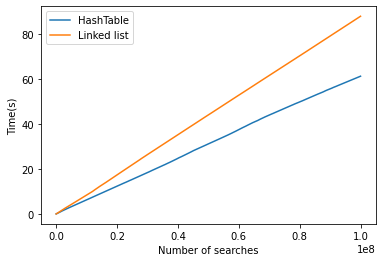

In [1]:
import pprint
import prettytable
import time
import matplotlib.pyplot as plt
from tqdm import tqdm

class Hashtable:
    def __init__(self,elements: list):
        self.size=len(elements)
        self.table=[[] for i in range(self.size)] # modify this for higher or less memory consumbtion 
        self.create_buckets(elements)
    def add(self,key,value):
        """Adds a new pair in the hashatable

        Args:
            key (hashable objects): the added key
            value (any): the added value

        Returns:
            None
        """
        index=hash(key)%value
        self.table[index].append((key,value))
        return None
    def create_buckets(self,l : list):
        """Creates a hashtable with a fixed size defined in self.size
        
        Args:
            l (list): contains the list which will be converted to hashtable later
        Returns:
            None
        """
        for i,j in l:
            index=hash(i)%self.size
            self.table[index].append((i,j))
        return None
    def find(self,req_key): # 
        """Find the required value in the hashtable given a key, find with O(n) time complexity, will create a method with a O(logn) complexity later 

        Args:
            req_key (hashable objects): the required key in the pair key-value

        Returns:
            any: returns the value in the pair key-value
        """
        index=hash(req_key)%self.size
        for key,value in self.table[index]:
            if req_key==key:
                return value
    def __str__(self):
        return pprint.pformat(self.table) # returns an str object
capitals = [
        ('France', 'Paris'),
        ('United States', 'Washington D.C.'),
        ('Italy', 'Rome'),
        ('Canada', 'Ottawa')]

heavy_stress=10000
hashtable = Hashtable(capitals)
t=range(0,heavy_stress**2,heavy_stress)
time_ht=[]
time_ll=[]
l=[i[0] for i in capitals]
b=len(l)
tik=time.time()
for j in tqdm(range(heavy_stress)):
    for i in range(heavy_stress):
        x=hashtable.find(l[i%b])
    time_ht.append(time.time()-tik)

tik=time.time()
for j in tqdm(range(heavy_stress)):
    for i in range(heavy_stress):
        for x,y in capitals:
            if x==l[i%b]:
                x=y
    time_ll.append(time.time()-tik)
plt.plot(t,time_ht,label='HashTable')
plt.xlabel("Number of searches")
plt.ylabel("Time(s)")
plt.plot(t,time_ll,label="Linked list")
plt.legend()